# Intro Cosmology Tutorial

## Authors
Rocio Kiman

## Learning Goals
* Know models in Astropy Cosmology
* Understand basic concepts in Cosmology
* Be able to modify the Dark Energy Model an analyze differences

## Keywords
cosmology, lambda cdm, dark energy

## Summary
In this tutorial, we will become familiar with the models available in `astropy.cosmology` and learn how the observables change when we modify the $\Lambda$CDM Model.

Documentation for astropy.cosmology can be find here http://docs.astropy.org/en/stable/cosmology/ 

In [2]:
from astropy.cosmology import WMAP9 as cosmo_wmap
from astropy.cosmology import FlatLambdaCDM, w0wzCDM
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import WMAP7

# $\Lambda$CDM

Lambda-CDM is the Standard Model of cosmology.

In [3]:
cosmo = FlatLambdaCDM(H0=67.74, Om0=0.33, Ob0=0.05 ,Tcmb0=2.725)

Let's check the energy density for Dark Energy and Dark Matter in our cosmology

$\Omega _\Lambda$:

In [7]:
cosmo.Ode0

0.6699089695090593

$\Omega _{c}$:

In [8]:
cosmo.Odm0

0.28

### Distance to high redshift object

In [93]:
z = np.linspace(0.0001,10,200)
a = 1/(1+z)
age = cosmo.age(z)

In [94]:
distmod = 10**((np.array(cosmo.distmod(z)/u.mag)/5)+1)/10**6
distang = cosmo.angular_diameter_distance(z)/u.Mpc
distcom = cosmo.comoving_distance(z)

Text(0, 0.5, 'Distance (Mpc)')

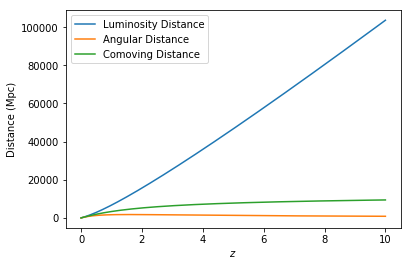

In [95]:
plt.plot(z, distmod,'-', label='Luminosity Distance')
plt.plot(z, distang,'-', label='Angular Distance')
plt.plot(z, distcom,'-', label='Comoving Distance')
plt.legend()
plt.xlabel('$z$')
plt.ylabel('Distance (Mpc)')

For higher redshifts the methods to calculate distances to those objects differ significantly 

### Age of the Universe high redshifts

Text(0, 0.5, 'Age (Gyr)')

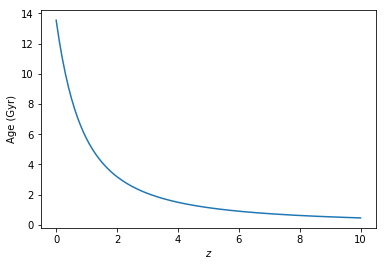

In [96]:
plt.plot(z, age,'-')
plt.xlabel('$z$')
plt.ylabel('Age (Gyr)')

# Universe with $50\%$ Dark Matter and $50\%$ Dark Energy

In [97]:
cosmo1 = FlatLambdaCDM(H0=67.74, Om0=0.55, Ob0=0.05 ,Tcmb0=2.725)

$\Omega _\Lambda$:

In [98]:
cosmo1.Ode0

0.4499089695090594

$\Omega _{c}$:

In [99]:
cosmo1.Odm0

0.5

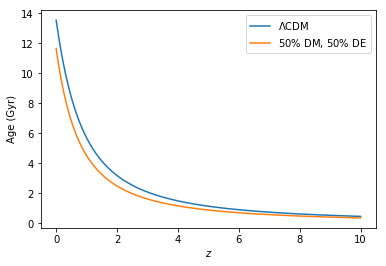

In [100]:
plt.plot(z, age,'-', label=r'$\Lambda$CDM')
plt.plot(z, cosmo1.age(z), '-', label=r'$50\%$ DM, $50\%$ DE')
plt.xlabel('$z$')
plt.ylabel('Age (Gyr)')
plt.legend()
plt.show()

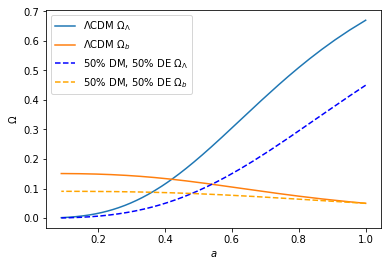

In [104]:
plt.plot(a,cosmo.Ode(z),'-', label=r'$\Lambda$CDM $\Omega_{\Lambda}$')
plt.plot(a,cosmo.Ob(z),'-', label=r'$\Lambda$CDM $\Omega_{b}$')
plt.plot(a,cosmo1.Ode(z), '--', color='b', label=r'$50\%$ DM, $50\%$ DE $\Omega_{\Lambda}$')
plt.plot(a,cosmo1.Ob(z), '--', color='orange', label=r'$50\%$ DM, $50\%$ DE $\Omega_{b}$')
plt.legend()
plt.xlabel('$a$')
plt.ylabel(r'$\Omega$')
plt.show()

# Specifying Dark Energy Model

Using w0wzCDM model: $w(z)=w_0+w_zz$ 

And we are going to use the same values for the energy densities at $z=0$ that we used for the $\Lambda$CDM Model.

In [108]:
cosmo2 = w0wzCDM(H0=67.74, Om0=0.33, Ob0=0.05, Ode0=0.69, Tcmb0=2.725 ,w0=-1.0, wz=0.5)

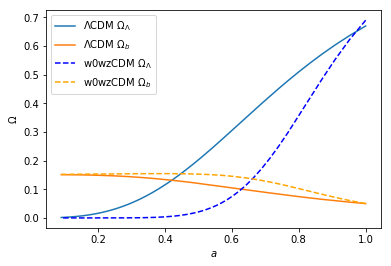

In [109]:
plt.plot(a,cosmo.Ode(z),'-', label=r'$\Lambda$CDM $\Omega_{\Lambda}$')
plt.plot(a,cosmo.Ob(z),'-', label=r'$\Lambda$CDM $\Omega_{b}$')
plt.plot(a,cosmo2.Ode(z), '--', color='b', label=r'w0wzCDM $\Omega_{\Lambda}$')
plt.plot(a,cosmo2.Ob(z), '--', color='orange', label=r'w0wzCDM $\Omega_{b}$')
plt.legend()
plt.xlabel('$a$')
plt.ylabel(r'$\Omega$')
plt.show()

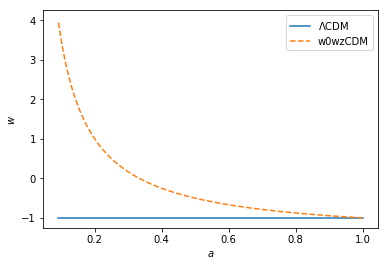

In [110]:
plt.plot(cosmo.scale_factor(z),cosmo.w(z),'-', label=r'$\Lambda$CDM')
plt.plot(cosmo2.scale_factor(z),cosmo2.w(z),'--', label=r'w0wzCDM')
plt.xlabel('$a$')
plt.ylabel('$w$')
plt.legend()
plt.show()

# Summary:

Lets review the conclusion we got in this tutorial:

1. You can define the $\Lambda$CDM Model by fixing the **energy densities**.
    
2. Yo can calculate the **distance** to objects at different redshifts and the age of the Universe at that redshift.

3. Yo can choose a **different model for Dark Energy** and compare the results.